In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
#from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score as f1
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 
import scipy.stats as stats
     

In [2]:

!pip install category_encoders
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:

df = pd.read_csv('/content/df2.csv', delimiter = ',')
df=df.drop("class",axis=1)
df.head()

,Make,Model,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,prestige
0,Toyota,Prius,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727,2
1,Renault,Grand Scenic,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000,2
2,Renault,Laguna,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000,3
3,Opel,Astra,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000,3
4,Mercedes,Vito,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636,4


In [4]:

X = df.drop('Price(euro)', axis=1)
y = df["Price(euro)"] 


In [5]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

In [6]:
display(categorical_features)
display(numerical_features)

['Make', 'Model', 'Style', 'Fuel_type', 'Transmission']

['Distance', 'Engine_capacity(cm3)', 'Age', 'km_year', 'prestige']

In [7]:
numerical_transformer = Pipeline([('scaler',StandardScaler())])

ct = ColumnTransformer([('num_transformer', numerical_transformer, numerical_features),
                          ('encoder', OrdinalEncoder(), categorical_features)
                         ])
  # Main pipeline for fitting.
pipeline = Pipeline([('column_transformer', ct)])

In [8]:
numerical_transformer = Pipeline([('poly_features', PolynomialFeatures(degree=2)),
                                  ('scaler',StandardScaler()) ])
categorical_transformer = Pipeline(steps=[ ('onehot', OrdinalEncoder(handle_unknown='ignore'))])

preprocessor_pipeline = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])




In [10]:
def fit_lineer_regersion(X, y, print_output=True):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  X_train=pipeline.fit_transform(X_train)
  X_test=pipeline.transform(X_test)

  regr = LinearRegression()
  regr.fit(X_train, y_train)

  y_preds = regr.predict(X_test)
  R2=r2_score(y_test, y_preds)
    
  return R2

In [11]:
fit_lineer_regersion(X,y)

0.5889841541981506

In [12]:
def Polynom_lineer_regersion(X, y, print_output=True):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  X_train=preprocessor_pipeline.fit_transform(X_train)
  X_test=preprocessor_pipeline.transform(X_test)

  regr = LinearRegression()
  regr.fit(X_train, y_train)

  y_preds = regr.predict(X_test)
  R2=r2_score(y_test, y_preds)
    
  return R2

In [13]:
Polynom_lineer_regersion(X,y)

0.7458317695804152

In [14]:
X.shape[1]

10

In [15]:
transformed=pipeline.fit_transform(X)


In [16]:
pca=PCA(n_components=10)
pca.fit(transformed)

PCA(n_components=10)

In [17]:
pca.explained_variance_ratio_.cumsum()

array([0.91215727, 0.9899669 , 0.9948182 , 0.9966624 , 0.9979812 ,
       0.99885175, 0.99958714, 0.99978591, 0.99990332, 1.        ])

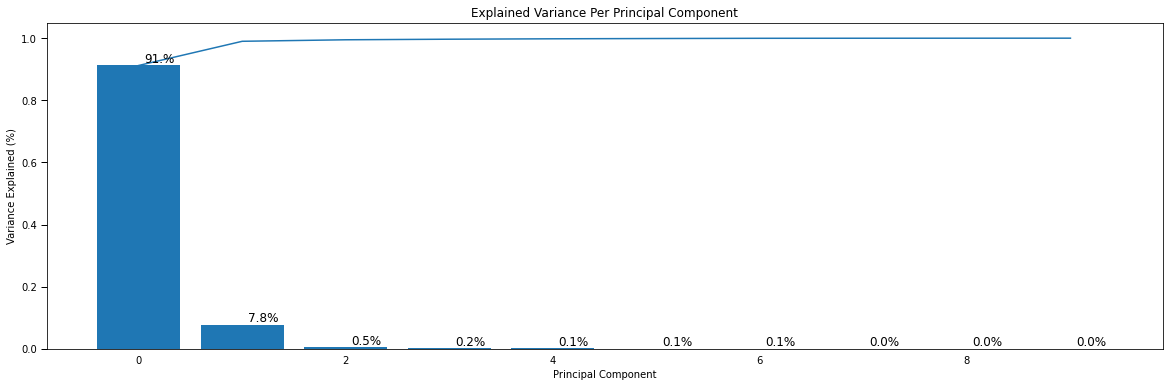

In [18]:
def scree_plot(pca):
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(round(vals[i]*100,1))[:3])), (ind[i]+0.2, vals[i]), 
                    va="bottom", 
                    ha="center", 
                    fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=1, length=6)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')
scree_plot(pca)

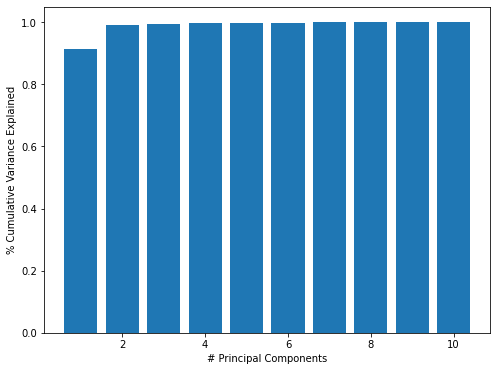

In [19]:
cum_exp_var = []
var_exp = 0
for i in pca.explained_variance_ratio_:
    var_exp += i
    cum_exp_var.append(var_exp)

# Plot cumulative explained variance for all PCs

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(range(1,11), cum_exp_var)
ax.set_xlabel('# Principal Components')
ax.set_ylabel('% Cumulative Variance Explained');

In [20]:
#Selecting the Right Number of Dimensions
def get_pca_components(pca, var):
    cumm_var = pca.explained_variance_ratio_
    total_var = 0.
    N_COMPONENTS = 0
    for i in cumm_var:
        N_COMPONENTS += 1
        total_var += i
        if total_var >= var:
            break
    return N_COMPONENTS

In [21]:
pca = PCA().fit(transformed)
n_components = get_pca_components(pca, 0.95)

In [22]:
n_components

2

In [23]:
pca = PCA(n_components=n_components)
X_d = pca.fit_transform(transformed)

In [24]:
transformed.shape

(32074, 10)

In [25]:
X_d.shape

(32074, 2)

In [26]:
pca.explained_variance_ratio_

array([0.91215727, 0.07780964])

In [27]:
 
pca_df = pd.DataFrame(
    data=X_d, 
    columns=['PC1', 'PC2'])
pca_df['target'] = y
pca_df['target'] = pca_df['target']
 
pca_df

,PC1,PC2,target
0,-35.802299,-9.529742,7750.0
1,-34.778922,-8.504196,8550.0
2,-33.783782,-8.500987,6550.0
3,-32.774897,-7.512393,4100.0
4,-31.759470,-6.559245,3490.0
...,...,...,...
32069,-30.710133,-5.505361,11500.0
32070,17.640148,16.717640,4400.0
32071,64.439817,4.954394,7000.0
32072,-25.407006,12.347814,4000.0


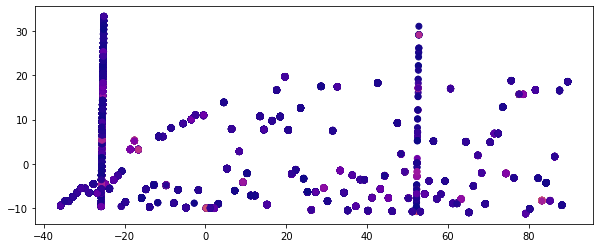

In [28]:

plt.figure(figsize=(10,4))
plt.scatter(X_d[:,0],X_d[:,1],c=y,cmap="plasma")


In [29]:
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
feature_names = X.columns
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
Make,-0.002225,-0.012656
Model,0.000673,-0.006307
Style,-0.004311,-0.000182
Distance,0.001230,-0.010955
Engine_capacity(cm3),-0.003486,0.007302
Fuel_type,0.015621,0.999456
Transmission,0.999832,-0.015616
Age,0.007183,0.005641
km_year,-0.001111,0.020788


In [30]:
pca.components_.shape

(2, 10)

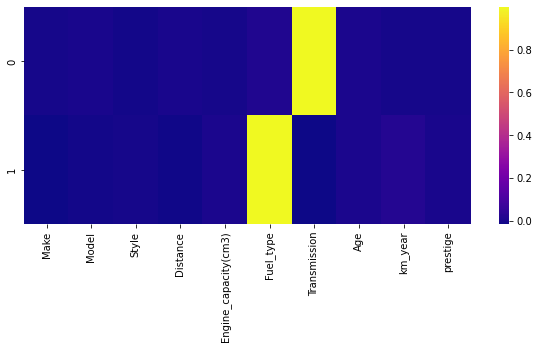

In [29]:
pca_data=pd.DataFrame(pca.components_,columns=feature_names)
plt.figure(figsize=(10,4))
sns.heatmap(pca_data,cmap='plasma')

In [31]:
def lineer_regersion(X, y, print_output=True):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  pca = PCA(n_components=2)

  X_train=pipeline.fit_transform(X_train)
  X_test=pipeline.transform(X_test)

  pc_X_train = pca.fit_transform(X_train)
  pc_X_test = pca.transform(X_test)

  regr = LinearRegression()
  regr.fit(X_train, y_train)

  y_preds = regr.predict(X_test)
  R2=r2_score(y_test, y_preds)
    
  return R2

In [32]:
lineer_regersion(X,y)

0.5889841541981506

In [33]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_validate
n_components = 2
pipe_pca = Pipeline([
    ('cat_encoder_', OrdinalEncoder(cols=categorical_features)),
    ('poly_featurizer_', PolynomialFeatures(degree=1)),
     ('scaler_', StandardScaler()),
    ('selector_', PCA(n_components=n_components)), 
    ('model_', LinearRegression() )])

cv_res5 = cross_validate(pipe_pca, X, y, cv=5, scoring='r2', return_train_score=True)
cv_res5

{'fit_time': array([0.2611897 , 0.23327398, 0.22434402, 0.20944667, 0.24686933]),
 'score_time': array([0.03614068, 0.02993584, 0.05674338, 0.02967906, 0.06384492]),
 'test_score': array([0.57405383, 0.49395271, 0.53282743, 0.49912256, 0.52459527]),
 'train_score': array([0.52819348, 0.53802818, 0.53281677, 0.53796063, 0.53173387])}

In [34]:
cv_res5['test_score'].mean()

0.5249103577367578

Для простых моделей тренировочная и валидационная ошибка находятся где-то рядом, и они велики. Это говорит о том, что модель недообучилась: то есть она не имеет достаточное кол-во параметров.

 для небольшого объема данных ошибки на обучающей выборке и в процессе кросс-валидации довольно сильно отличаются, что указывает на переобучение. Для той же модели, но с большим объемом данных ошибки "сходятся", что указывается на недообучение.

In [35]:
def Polynom_regersion(X, y, n,print_output=True):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  pca = PCA(n_components=n)

  X_train=preprocessor_pipeline.fit_transform(X_train)
  X_test=preprocessor_pipeline.transform(X_test)

  pc_X_train = pca.fit_transform(X_train)
  pc_X_test = pca.transform(X_test)

  regr = LinearRegression()
  regr.fit(X_train, y_train)

  y_preds = regr.predict(X_test)
  R2=r2_score(y_test, y_preds)
    
  return R2

In [36]:
numerical_transformer = Pipeline([('scaler',StandardScaler()),
                                  ('poly_featurizer_', PolynomialFeatures(degree=2))])

ct = ColumnTransformer([('num_transformer', numerical_transformer, numerical_features),
                          ('encoder', OrdinalEncoder(), categorical_features)
                         ])
pipeline=Pipeline([('column_transformer', ct)])

In [37]:
X_new=pipeline.fit_transform(X)
X_new.shape

(32074, 26)

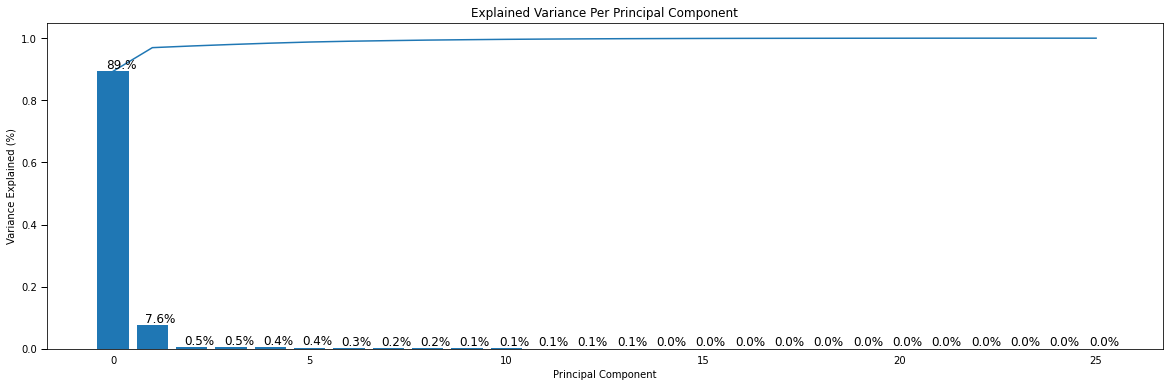

In [38]:
X_new=pipeline.fit_transform(X)
pca=PCA(n_components=26)
pca.fit(X_new)
scree_plot(pca)

In [39]:
pca = PCA().fit(X_new)
n_components = get_pca_components(pca, 0.95)

In [40]:
n_components

2

In [41]:
Polynom_regersion(X,y,2)

0.7458317695804152

In [42]:
n_components = 2
pipe_pca = Pipeline([('column_transformer', ct),
                     ('selector_', PCA(n_components=n_components)),
                     ('linear_regression', LinearRegression() ) 
     ])

cv_res5 = cross_validate(pipe_pca, X, y, cv=5, scoring='r2', return_train_score=True)
cv_res5

{'fit_time': array([0.23453021, 0.34929371, 0.32319236, 0.27783346, 0.28522134]),
 'score_time': array([0.03453207, 0.07092714, 0.07157135, 0.05826092, 0.03556371]),
 'test_score': array([-0.01849939, -0.03772789,  0.00464732, -0.02323078, -0.01826108]),
 'train_score': array([0.01207137, 0.01008185, 0.00954747, 0.01120135, 0.00809332])}

In [43]:
cv_res5['test_score'].mean()

-0.018614365078603833

In [44]:

n_component = [2,4,6,9,12,15,18]

r2_score1=[]
for num in n_component:
  degree=num
  pipe_pca = Pipeline([('column_transformer', ct),
                     ('selector_', PCA(n_components=degree)),
                     ('linear_regression', LinearRegression() ) 
     ])
  cv_res5 = cross_validate(pipe_pca, X, y, cv=5, scoring='r2', return_train_score=True)
  r2_score1.append(cv_res5["test_score"].mean())

In [45]:
r2_score1

[-0.018614365078603767,
 0.10684681069069639,
 0.12575688451633832,
 0.5530258136410902,
 0.6841858291284015,
 0.7197063751845565,
 0.7199888057600313]

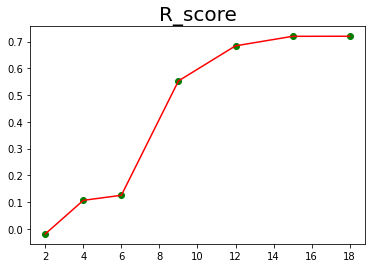

In [46]:
plt.scatter(n_component,r2_score1, color="green")
plt.plot(n_component,r2_score1, color="red") 
plt.title('R_score',fontsize=20)
plt.show()
     

In [47]:
Polynom_regersion(X,y,16)

0.7458317695804152

In [53]:
numerical_transformer = Pipeline([('scaler',StandardScaler()),
                                  ('poly_featurizer_', PolynomialFeatures(degree=4))])

ct = ColumnTransformer([('num_transformer', numerical_transformer, numerical_features),
                          ('encoder', OrdinalEncoder(), categorical_features)
                         ])
pipeline=Pipeline([('column_transformer', ct)])

In [54]:
def Polynom_regersion(X, y, n,print_output=True):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

  pca = PCA(n_components=n)

  X_train=pipeline.fit_transform(X_train)
  X_test=pipeline.transform(X_test)

  pc_X_train = pca.fit_transform(X_train)
  pc_X_test = pca.transform(X_test)

  regr = LinearRegression()
  regr.fit(X_train, y_train)

  y_preds = regr.predict(X_test)
  R2=r2_score(y_test, y_preds)
    
  return R2

In [55]:

X_new=pipeline.fit_transform(X)
display(X_new.shape)


(32074, 131)

<Figure size 1440x720 with 0 Axes>

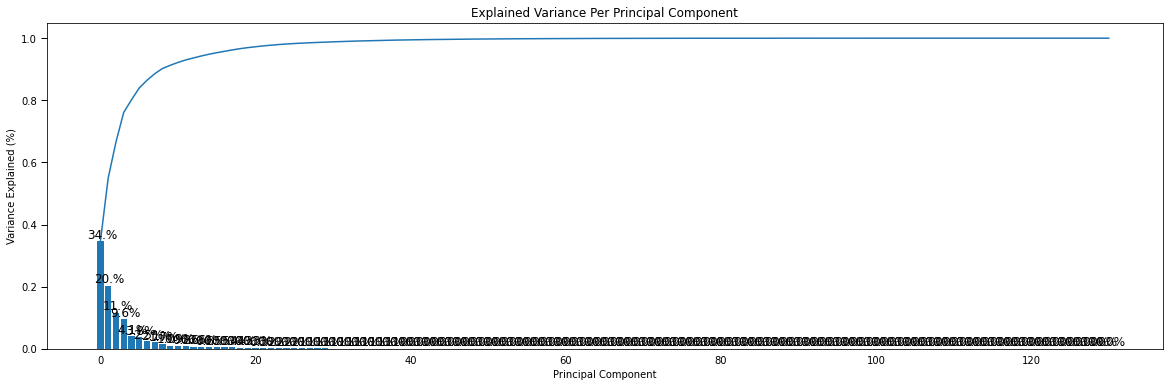

In [56]:
X_new=pipeline.fit_transform(X)
pca=PCA(n_components=131)
pca.fit(X_new)
plt.figure(figsize=(20,10))
scree_plot(pca)

In [57]:
pca = PCA().fit(X_new)
n_components = get_pca_components(pca, 0.95)

In [58]:
n_components

16

In [59]:
Polynom_regersion(X,y,16)

0.8019709189643669

In [60]:

n_component = [16,18,23,27,30,35,40,45,50,55,60]

r2_score1=[]
for num in n_component:
  degree=num
  pipe_pca = Pipeline([('column_transformer', ct),
                     ('selector_', PCA(n_components=degree)),
                     ('linear_regression', LinearRegression() ) 
     ])
  cv_res5 = cross_validate(pipe_pca, X, y, cv=5, scoring='r2', return_train_score=True)
  r2_score1.append(cv_res5["test_score"].mean())

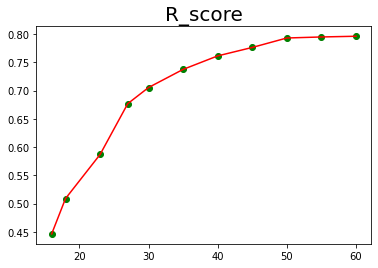

In [61]:
plt.scatter(n_component,r2_score1, color="green")
plt.plot(n_component,r2_score1, color="red") 
plt.title('R_score',fontsize=20)
plt.show()
     

In [62]:
Polynom_regersion(X,y,60)

0.8019709189643669